In [7]:
df = pd.read_csv("netflix_titles.csv")

In [9]:
# Display basic info and first few rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   

In [15]:
# Handling missing values (fill or drop)
df.fillna({"director": "Unknown", "cast": "Unknown", "country": "Unknown"}, inplace=True)
df.dropna(subset=["release_year"], inplace=True)


In [19]:
# Convert release year to integer
df["release_year"] = df["release_year"].astype(int)

In [21]:
# Filter: Only Movies released after 2015
movies_after_2015 = df[(df["type"] == "Movie") & (df["release_year"] > 2015)]
print(movies_after_2015.head())

   show_id   type                             title  \
0       s1  Movie              Dick Johnson Is Dead   
6       s7  Movie  My Little Pony: A New Generation   
9      s10  Movie                      The Starling   
12     s13  Movie                      Je Suis Karl   
13     s14  Movie  Confessions of an Invisible Girl   

                         director  \
0                 Kirsten Johnson   
6   Robert Cullen, José Luis Ucha   
9                  Theodore Melfi   
12            Christian Schwochow   
13                  Bruno Garotti   

                                                 cast  \
0                                             Unknown   
6   Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
13  Klara Castanho, Lucca Picon, Júlia Gomes, Marc...   

                    country          date_added  release_year rating duration  \
0             United S

In [23]:
# Sorting by release year in descending order
df_sorted = df.sort_values(by="release_year", ascending=False)
print(df_sorted.head())


    show_id     type                                  title        director  \
693    s694    Movie                 Ali & Ratu Ratu Queens  Lucky Kuswandi   
781    s782    Movie  Black Holes | The Edge of All We Know   Peter Galison   
762    s763    Movie                           Sweet & Sour   Lee Kae-byeok   
763    s764  TV Show                            Sweet Tooth         Unknown   
764    s765    Movie           Trippin' with the Kandasamys   Jayan Moodley   

                                                  cast        country  \
693  Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...        Unknown   
781                                            Unknown        Unknown   
762          Jang Ki-yong, Chae Soo-bin, Jung Soo-jung    South Korea   
763  Nonso Anozie, Christian Convery, Adeel Akhtar,...  United States   
764  Jailoshini Naidoo, Maeshni Naicker, Madhushan ...   South Africa   

        date_added  release_year rating  duration  \
693  June 17, 2021          2021 

In [25]:
# Creating a new column 'title_length' for length of the title
df["title_length"] = df["title"].apply(len)
print(df[["title", "title_length"]].head())

                   title  title_length
0   Dick Johnson Is Dead            20
1          Blood & Water            13
2              Ganglands             9
3  Jailbirds New Orleans            21
4           Kota Factory            12


In [27]:
# Grouping by type and counting
type_counts = df["type"].value_counts()
print(type_counts)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6728\2930410685.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="coolwarm")


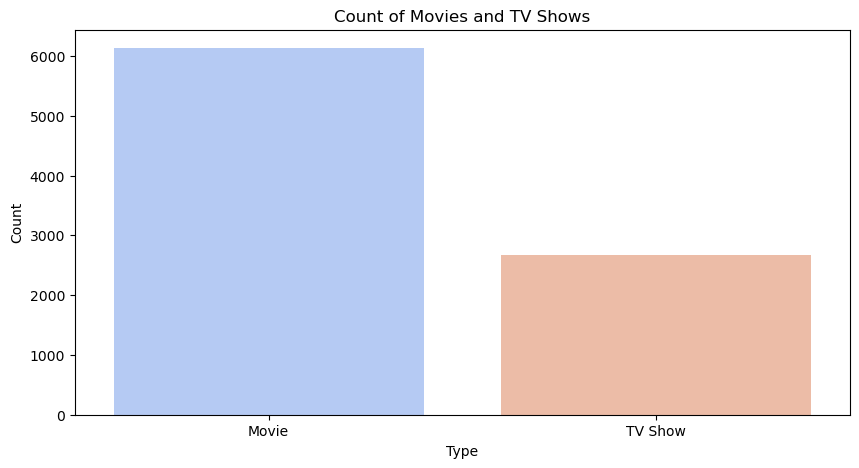

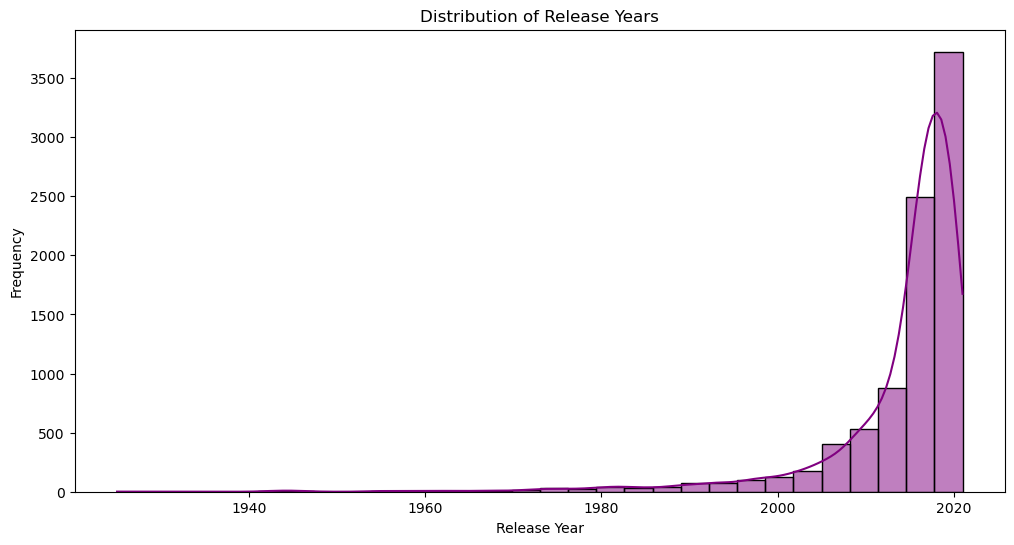

In [31]:
# Visualization using seaborn and matplotlib
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="type", palette="coolwarm")
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df["release_year"], bins=30, kde=True, color="purple")
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.show()


In [33]:
# Saving the modified dataset
df.to_csv("netflix_titles_modified.csv", index=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6728\2899495599.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")


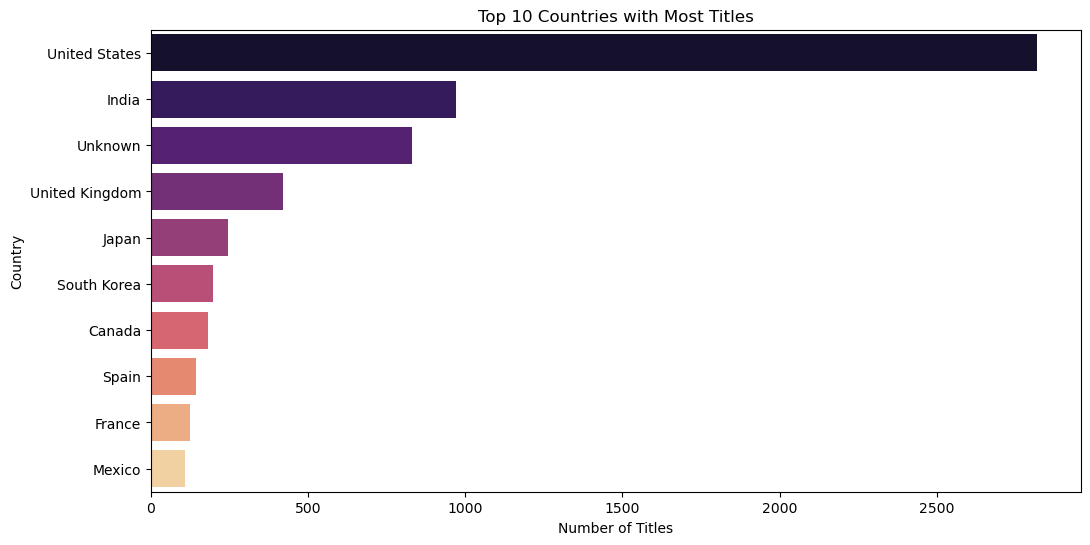

In [35]:
# Top 10 countries with most titles
plt.figure(figsize=(12, 6))
top_countries = df["country"].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")
plt.title("Top 10 Countries with Most Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

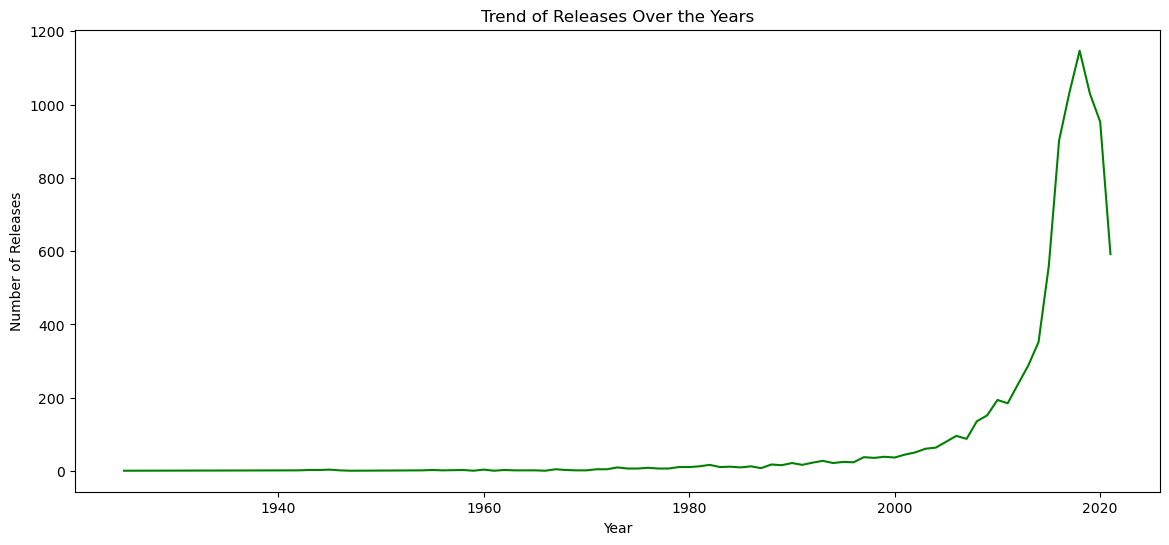

In [37]:
# Release trend over years
plt.figure(figsize=(14, 6))
sns.lineplot(x=df["release_year"].value_counts().index, y=df["release_year"].value_counts().values, color="green")
plt.title("Trend of Releases Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.show()


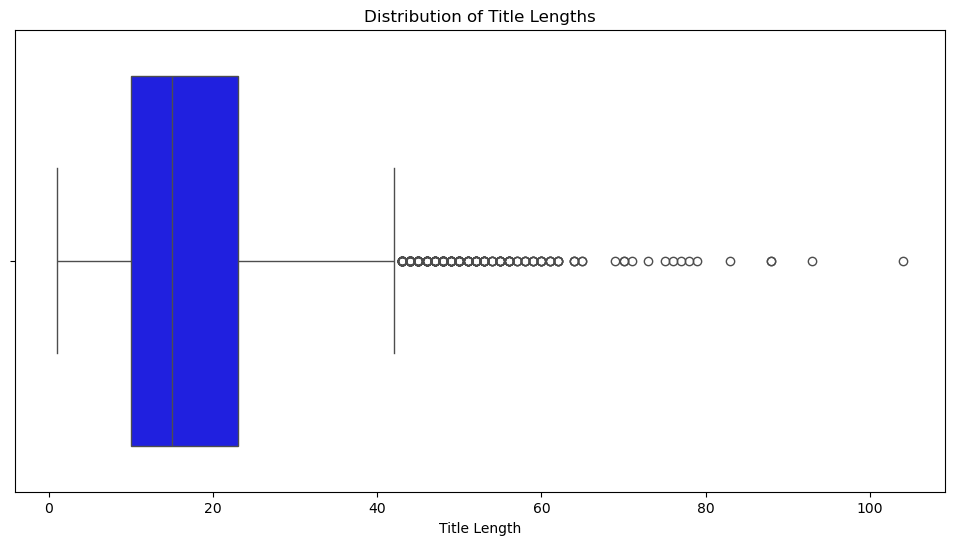

In [39]:
# Distribution of title lengths
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["title_length"], color="blue")
plt.title("Distribution of Title Lengths")
plt.xlabel("Title Length")
plt.show()

In [41]:
# Saving the modified dataset
df.to_csv("netflix_titles_modified.csv", index=False)